# ROC Curves vs Precision–Recall Curves

This notebook compares ROC curves and Precision–Recall (PR) curves for evaluating
binary classifiers.

Using MNIST digit classification (5 vs not-5), we show:
- how ROC and PR curves are constructed
- what each curve measures
- why ROC curves can be misleading under class imbalance
- when PR curves provide more actionable insight

The goal is to understand *what question each curve answers*.


# ROC Curves vs Precision–Recall Curves

This notebook compares ROC curves and Precision–Recall (PR) curves for evaluating
binary classifiers.

Using MNIST digit classification (5 vs not-5), we show:
- how ROC and PR curves are constructed
- what each curve measures
- why ROC curves can be misleading under class imbalance
- when PR curves provide more actionable insight

The goal is to understand *what question each curve answers*.


## Problem Context

We consider an imbalanced binary classification problem:
- Positive class: digit "5"
- Negative class: all other digits (~90%)

In such settings, evaluation metrics must be chosen carefully, as some metrics
can hide critical failure modes.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve
)


## Training a Linear Classifier

We use a simple linear classifier to focus on evaluation rather than
model complexity.


In [5]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

y_is_5 = (y == 5)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y_is_5[:60000], y_is_5[60000:]


In [6]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

y_scores = sgd_clf.decision_function(X_train)


## ROC Curve

The ROC curve plots:
- True Positive Rate (Recall)
- against False Positive Rate

for all possible decision thresholds.

ROC curves measure *ranking quality*, not decision quality.


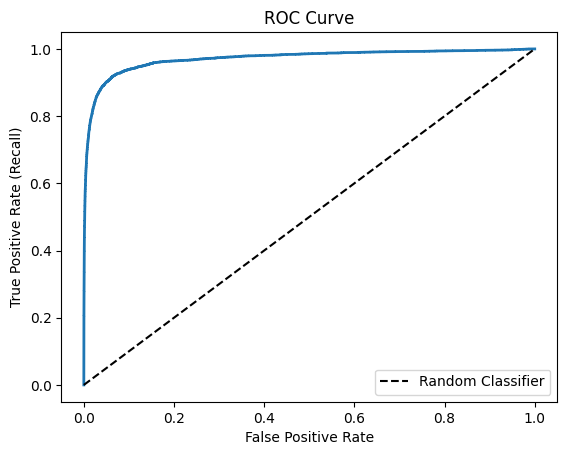

In [7]:
fpr, tpr, roc_thresholds = roc_curve(y_train, y_scores)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Area Under the ROC Curve (AUC)

AUC measures the probability that a randomly chosen positive instance
is ranked higher than a randomly chosen negative instance.


In [8]:
roc_auc_score(y_train, y_scores)


0.9709618248430906

### Interpretation

A high AUC indicates good separation between classes.
However, ROC curves do not reflect the absolute number of false positives,
which can be problematic in highly imbalanced datasets.


## Precision–Recall Curve

Precision–Recall curves focus explicitly on the positive class and are
more sensitive to class imbalance.


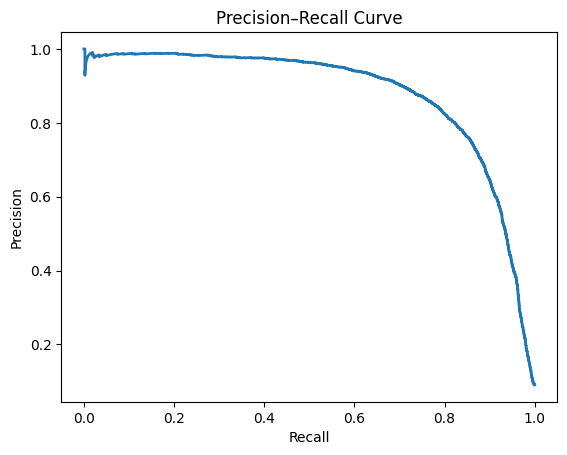

In [9]:
precisions, recalls, pr_thresholds = precision_recall_curve(y_train, y_scores)

plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


## ROC vs PR: Key Differences

- ROC curves measure how well the model ranks positives above negatives.
- PR curves measure how reliable positive predictions are.

In imbalanced problems:
- ROC curves can look deceptively good
- PR curves reveal the true cost of false positives


### Why ROC Can Be Misleading Under Class Imbalance

When negative samples dominate, the false positive rate can remain low
even when the absolute number of false positives is large.

As a result, ROC curves may suggest strong performance while the model
produces many incorrect positive predictions.


## When to Use ROC vs PR Curves

- Use ROC curves to compare ranking quality between classifiers.
- Use PR curves when the positive class is rare and false positives are costly.

Metric choice should always reflect the problem context.


## Key Takeaways

- ROC curves evaluate ranking ability across thresholds.
- AUC has a clear probabilistic interpretation but ignores decision costs.
- Precision–Recall curves focus on positive-class performance.
- For imbalanced problems, PR curves often provide more actionable insight.
- Evaluation metrics are not neutral; they encode assumptions and priorities.
